# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
!pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


In [3]:
cities

['udachny',
 'samarinda',
 'longyearbyen',
 'yellowknife',
 'edinburgh of the seven seas',
 'makoua',
 'albany',
 'shache',
 'bredasdorp',
 'college',
 'zamora',
 'cargados carajos',
 'ust-nera',
 'waitangi',
 'axim',
 'tura',
 'grytviken',
 'port-aux-francais',
 'talnakh',
 'devinuwara',
 "ytyk-kyuyel'",
 'porto novo',
 'kodiak',
 'nizhnesortymskiy',
 'puerto natales',
 "la'ie",
 'gadzhiyevo',
 'salair',
 'adamstown',
 'toamasina',
 'polyarnyy',
 'san luis',
 'bandarbeyla',
 'qaqortoq',
 'afaahiti',
 'bethel',
 'puerto ayora',
 'blackmans bay',
 'tiksi',
 'dange',
 'jinghong',
 'sao joao da barra',
 'okha',
 'saint-joseph',
 'harstad',
 'san julian',
 'aldan',
 'marudi',
 'siraha',
 'jamestown',
 'andorra',
 'vilyuchinsk',
 'tanrake village',
 'rathdrum',
 'merizo village',
 'arkhara',
 'morki',
 'nagqu',
 'margaret river',
 'kangding',
 'ilulissat',
 'rio grande',
 'khovd',
 'hermanus',
 'hawaiian paradise park',
 'cable beach',
 'wailua homesteads',
 'masterton',
 'chonchi',
 'aasia

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"
print(url + "&q=san francisco")

http://api.openweathermap.org/data/2.5/weather?units=metric&appid=6dcffe34112f0bf3f65d50373fce6af2&q=san francisco


In [6]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"] 

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | udachny
Processing Record 2 of Set 1 | samarinda
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | makoua
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | shache
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | college
Processing Record 11 of Set 1 | zamora
Processing Record 12 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 13 of Set 1 | ust-nera
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | axim
Processing Record 16 of Set 1 | tura
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | talnakh
Processing Record 20 of Set 1 | devinuwara
City not found. Skipping...
Processing Record 21 of Set 1 | ytyk-kyuyel

Processing Record 39 of Set 4 | la palma
Processing Record 40 of Set 4 | constantia
Processing Record 41 of Set 4 | chavinda
Processing Record 42 of Set 4 | segezha
Processing Record 43 of Set 4 | bereket
Processing Record 44 of Set 4 | takamaka
City not found. Skipping...
Processing Record 45 of Set 4 | fairbanks
Processing Record 46 of Set 4 | mpanda
Processing Record 47 of Set 4 | san patricio
Processing Record 48 of Set 4 | touros
Processing Record 49 of Set 4 | puerto san carlos
City not found. Skipping...
Processing Record 0 of Set 5 | basco
Processing Record 1 of Set 5 | egilsstadir
Processing Record 2 of Set 5 | petawawa
Processing Record 3 of Set 5 | dingcheng
Processing Record 4 of Set 5 | robbah
Processing Record 5 of Set 5 | itamaraca
Processing Record 6 of Set 5 | petropavlovsk-kamchatsky
Processing Record 7 of Set 5 | borovskoy
Processing Record 8 of Set 5 | viana do castelo
Processing Record 9 of Set 5 | cerritos
Processing Record 10 of Set 5 | dolores
Processing Record 

Processing Record 31 of Set 8 | zavetnoye
Processing Record 32 of Set 8 | kongsberg
Processing Record 33 of Set 8 | la passe
Processing Record 34 of Set 8 | funafuti
Processing Record 35 of Set 8 | lerwick
Processing Record 36 of Set 8 | tughyl
Processing Record 37 of Set 8 | atafu village
Processing Record 38 of Set 8 | dingwall
Processing Record 39 of Set 8 | sinjar
Processing Record 40 of Set 8 | ad dilam
Processing Record 41 of Set 8 | lompoc
Processing Record 42 of Set 8 | serdobsk
Processing Record 43 of Set 8 | luanda
Processing Record 44 of Set 8 | dudinka
Processing Record 45 of Set 8 | mahanje
Processing Record 46 of Set 8 | dunedin
Processing Record 47 of Set 8 | concordia
Processing Record 48 of Set 8 | kamennomostskiy
Processing Record 49 of Set 8 | nikolayevsk-on-amure
Processing Record 0 of Set 9 | skelleftea
Processing Record 1 of Set 9 | derzhavinsk
Processing Record 2 of Set 9 | lorengau
Processing Record 3 of Set 9 | bandar-e lengeh
Processing Record 4 of Set 9 | voi

Processing Record 21 of Set 12 | gurghiu
Processing Record 22 of Set 12 | valparaiso
Processing Record 23 of Set 12 | khilok
Processing Record 24 of Set 12 | kolonia
Processing Record 25 of Set 12 | pangai
Processing Record 26 of Set 12 | lazaro cardenas
Processing Record 27 of Set 12 | altusried
Processing Record 28 of Set 12 | vastervik
City not found. Skipping...
Processing Record 29 of Set 12 | kaoma
Processing Record 30 of Set 12 | tikapur
Processing Record 31 of Set 12 | soure
Processing Record 32 of Set 12 | gazojak
-----------------------------
Data Retrieval Complete      
-----------------------------


In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,udachny,66.4167,112.4000,-23.94,100,96,1.91,RU,1705923823
1,samarinda,-0.5000,117.1500,24.37,97,82,1.15,ID,1705923823
2,longyearbyen,78.2186,15.6401,-9.09,67,20,11.32,SJ,1705923603
3,yellowknife,62.4560,-114.3525,-34.77,90,20,0.00,CA,1705923824
4,edinburgh of the seven seas,-37.0676,-12.3116,19.17,87,71,9.75,SH,1705923554


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,udachny,66.4167,112.4000,-23.94,100,96,1.91,RU,1705923823
1,samarinda,-0.5000,117.1500,24.37,97,82,1.15,ID,1705923823
2,longyearbyen,78.2186,15.6401,-9.09,67,20,11.32,SJ,1705923603
3,yellowknife,62.4560,-114.3525,-34.77,90,20,0.00,CA,1705923824
4,edinburgh of the seven seas,-37.0676,-12.3116,19.17,87,71,9.75,SH,1705923554


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

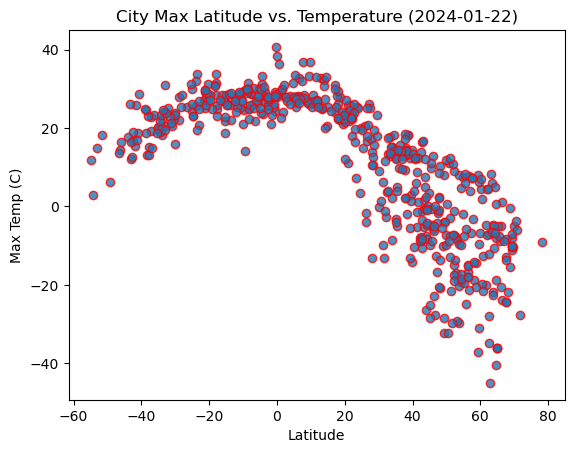

In [21]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="red",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)


# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
    
    
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

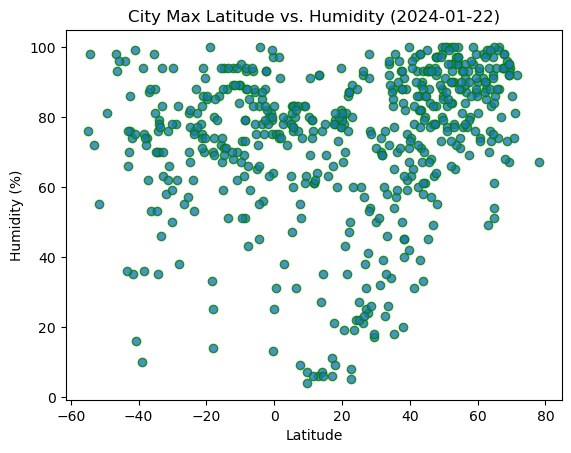

In [22]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="green",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

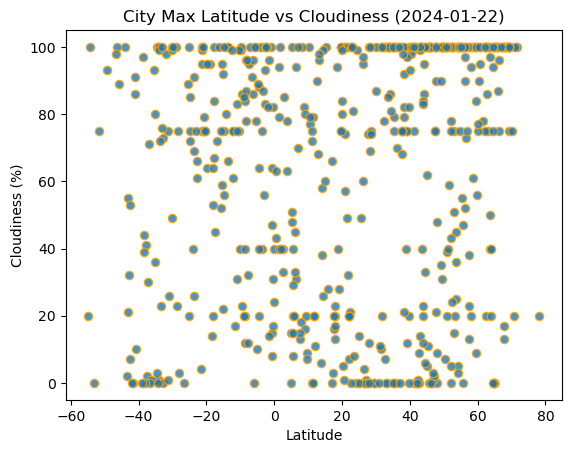

In [24]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="orange",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

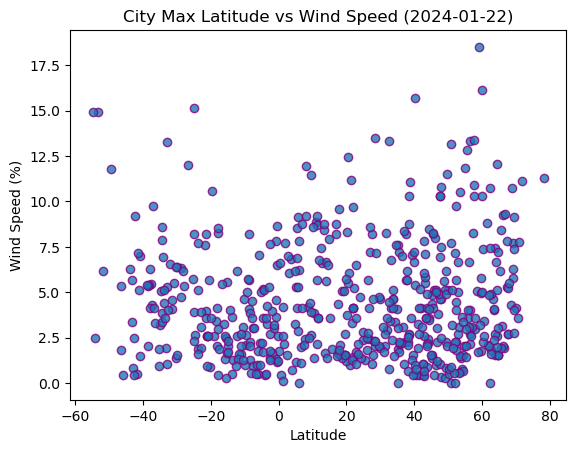

In [25]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="purple",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [31]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x_value, y_value, title, text_coord):
    
    #Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_value, "r-")
    plt.annotate(line_eq, text_coord, fontsize=15, color="red")
    plt.xlabel("Lat")
    plt.ylabel(title)
    print(f"The r-value is {rvalue ** 2}")
    plt.show()
    

In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,udachny,66.4167,112.4000,-23.94,100,96,1.91,RU,1705923823
2,longyearbyen,78.2186,15.6401,-9.09,67,20,11.32,SJ,1705923603
3,yellowknife,62.4560,-114.3525,-34.77,90,20,0.00,CA,1705923824
5,makoua,0.0069,15.6333,38.31,25,24,1.74,CG,1705923824
6,albany,42.6001,-73.9662,-8.69,86,9,0.45,US,1705923825


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,samarinda,-0.5000,117.1500,24.37,97,82,1.15,ID,1705923823
4,edinburgh of the seven seas,-37.0676,-12.3116,19.17,87,71,9.75,SH,1705923554
8,bredasdorp,-34.5322,20.0403,19.06,70,100,7.87,ZA,1705923825
10,zamora,-4.0692,-78.9567,23.58,100,100,0.45,EC,1705923682
12,waitangi,-43.9535,-176.5597,17.68,96,100,6.26,NZ,1705923826


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.6731151225363912


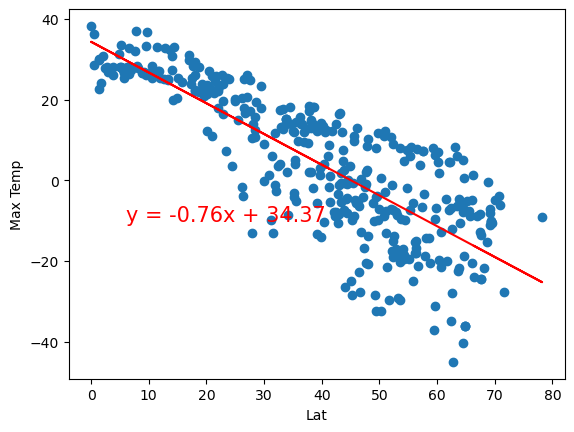

In [35]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6, -10))

The r-value is 0.44004433870854165


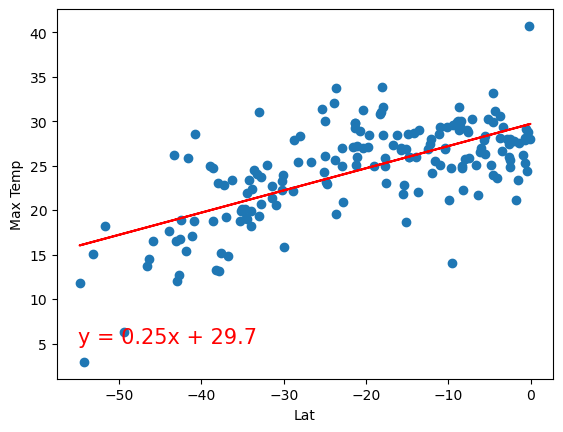

In [36]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 5))

**Discussion about the linear relationship:** - (Opposite effect based on northern/southern part of the equator)
Max Temp Decreases as latitude dips passed north of the equator (positive latitude)
Max Temp Increases as latitude dips passed south of the equator (negative latitude)

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.1815850142072658


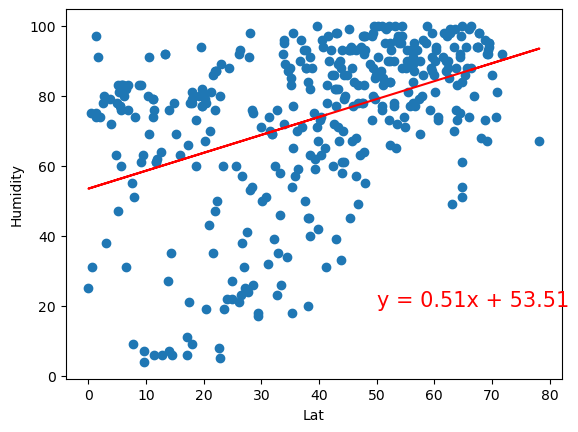

In [39]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (50, 20))

The r-value is 0.014125103430362227


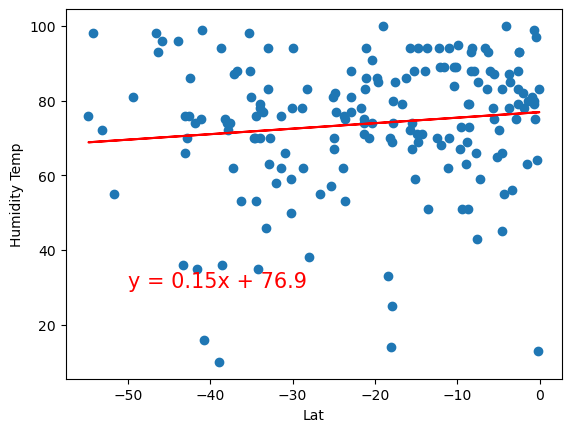

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity Temp", (-50, 30))

**Discussion about the linear relationship:** - Positive Lat = more north of equator, Negative Lat = more south of equator.
The more positive the latitude the higher the humidity density (cluster). Regression line more positive, going up
The more negative the latitude the lower the humidity density (sporadic). Regression line more flat, consistent

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.05277193602813615


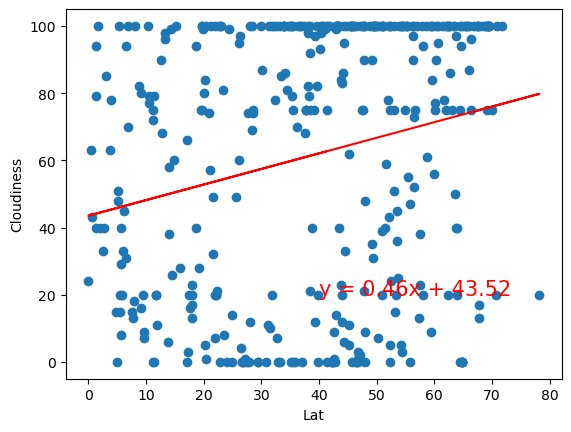

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40, 20))

The r-value is 0.03688103163965483


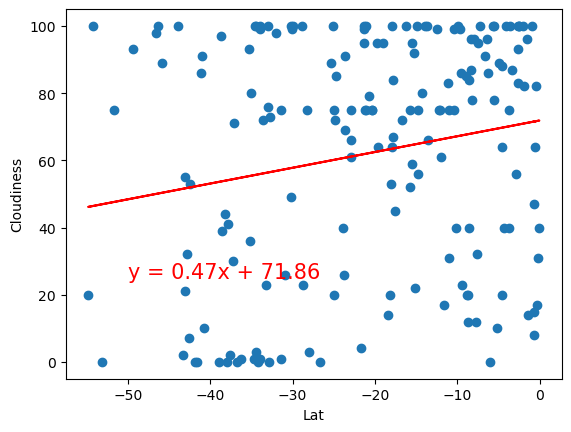

In [43]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-50, 25))

**Discussion about the linear relationship:** - both have a similar line of regression
More positive Lat = higher cloudiness
More negative Lat = less cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.0027480859933845534


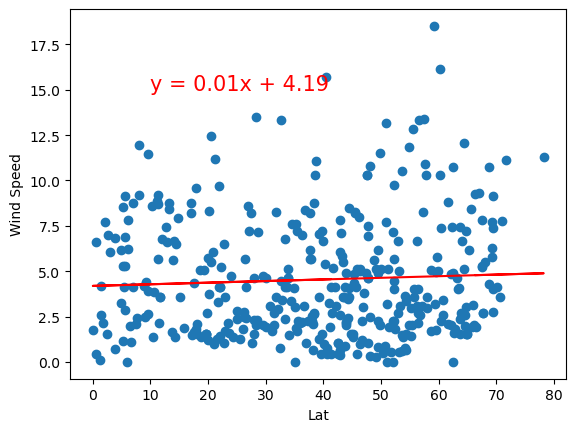

In [44]:
# Northern Hemisphere
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10, 15))

The r-value is 0.1029341378489727


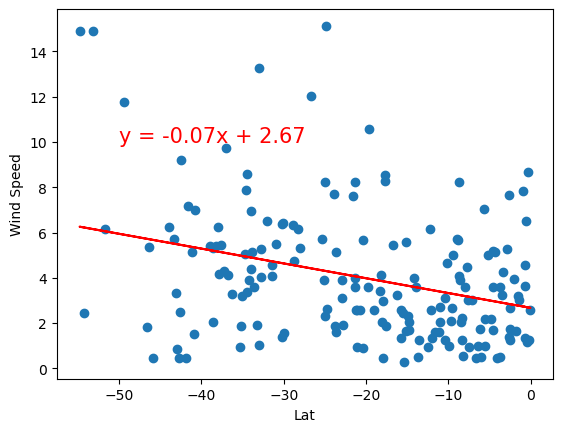

In [45]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 10))

**Discussion about the linear relationship:**
Wind speed for positive latitude stays relatively consistent. Does not change as the line is flat
Wind speed for negative latitude tends to show a negative slope. Meaning passing equator going south means more wind.